There are also checks of the derivatives in `reconstructed_DM_likelihood.ipynb`

In [1]:
import sys
sys.path.append("/home/mariacst/exoplanets/exoplanets/python/")
import derivatives
import imp
imp.reload(derivatives)

import glob
import numpy as np
import matplotlib.pyplot as plt

from derivatives import derivativeTDM_wrt_r, derivativeTDM_wrt_M, derivativeTint_wrt_A, derivativeTint_wrt_M

**Checking derivative of Tint wrt M**

In [89]:
# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2] 

path  = "../data/evolution_models/ATMO_2020_models/evolutionary_tracks/"
model = "ATMO_CEQ/"

evolution_ATMO20      = {}
evolution_ATMO20["M"] = []

evolution_ATMO20[model] = {}
files = glob.glob(path + model + "*.txt")
for file in files:
    data = np.genfromtxt(file, unpack=True)
    evolution_ATMO20[model][data[0][0]] = [data[1], data[2], data[3], data[4], data[5]] 
    # age [Gyr] / Teff [K] / L [L/Lsun] / R [R/Rsun] / log g [cm/s2]
    evolution_ATMO20["M"].append(data[0][0])

In [20]:
masses = np.sort(np.asarray(evolution_ATMO20["M"]))
pos    = np.where((masses > 0.014) & (masses < 0.052))
masses = masses[pos]
#print(masses)

ages = evolution_ATMO20["ATMO_CEQ/"][masses[0]][0]
Teff  = {}

for i in range(len(ages)):
    Teff[ages[i]] = []
    for mass in masses:
        Teff[ages[i]].append(evolution_ATMO20["ATMO_CEQ/"][mass][1][i])

In [21]:
pos  = np.where((ages > 0.9) & (ages < 10.5))
ages = ages[pos]

In [22]:
print(masses)

[0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026
 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038
 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049 0.05
 0.051]


In [50]:
age  = ages[6]
i = 3
mass = masses[i]
print(age, mass)

3.88815518 0.018


In [51]:
print(derivativeTint_wrt_M(mass, age, points, values, size=7000, h=0.001))
epsilon=0.001
print(0.5*(Teff[age][i+1] - Teff[age][i-1])/epsilon)

16488.756685522134
16497.787979999997


In [30]:
masses[7]-masses[6]

0.0009999999999999974

**Checking derivative of Tint wrt A**

In [52]:
masses = np.sort(np.asarray(evolution_ATMO20["M"]))
pos    = np.where((masses > 0.014) & (masses < 0.052))
masses = masses[pos]
#print(masses)

ages = evolution_ATMO20["ATMO_CEQ/"][masses[0]][0]
Teff  = {}

for i in range(len(ages)):
    Teff[ages[i]] = []
    for mass in masses:
        Teff[ages[i]].append(evolution_ATMO20["ATMO_CEQ/"][mass][1][i])
        
        
for i in range(len(masses)):
    Teff[masses[i]] = []
    for j in range(len(ages)):
        Teff[masses[i]].append(evolution_ATMO20["ATMO_CEQ/"][masses[i]][1][j])

0.015


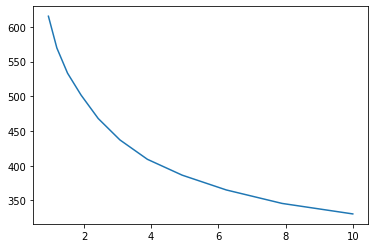

In [60]:
print(masses[0])
fig, ax = plt.subplots()

pos = np.where((ages>0.9) & (ages<10.5))

ax.plot(ages[pos], np.array(Teff[masses[0]])[pos])

In [84]:
i = 38
age  = ages[i]
mass = masses[34]
print(age, mass)

7.89652287 0.049


In [85]:
print(derivativeTint_wrt_A(mass, age, points, values, size=7000, h=0.001))
print((Teff[mass][i+1] - Teff[mass][i-1])/(ages[i+1]-ages[i-1]))

-25.589193589269144
-22.243824515784812


In [78]:
print(derivativeTint_wrt_A(mass, age, points, values, size=7000, h=0.001))
print((Teff[mass][i+1] - Teff[mass][i-1])/(ages[i+1]-ages[i-1]))

-287.04164558348566
-264.3043419520106


**Checking derivative of TDM wrt M**

In [91]:
from utils import T_DM
import astropy.units as u
from astropy.constants import M_jup, M_sun

In [98]:
print(masses)

masses_inkg = np.array(masses)*M_sun.value
print(masses_inkg)

[0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026
 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038
 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049 0.05
 0.051]
[2.98261481e+28 3.18145579e+28 3.38029678e+28 3.57913777e+28
 3.77797875e+28 3.97681974e+28 4.17566073e+28 4.37450172e+28
 4.57334270e+28 4.77218369e+28 4.97102468e+28 5.16986566e+28
 5.36870665e+28 5.56754764e+28 5.76638863e+28 5.96522961e+28
 6.16407060e+28 6.36291159e+28 6.56175257e+28 6.76059356e+28
 6.95943455e+28 7.15827553e+28 7.35711652e+28 7.55595751e+28
 7.75479850e+28 7.95363948e+28 8.15248047e+28 8.35132146e+28
 8.55016244e+28 8.74900343e+28 8.94784442e+28 9.14668541e+28
 9.34552639e+28 9.54436738e+28 9.74320837e+28 9.94204935e+28
 1.01408903e+29]


In [126]:
r = 0.1

TDM = []

for mass in masses_inkg:
    TDM.append(T_DM(r, M=mass, f=0.2, params=[0.1, 20., 0.42], v=100.))

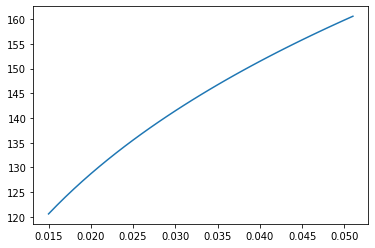

In [127]:
fig, ax = plt.subplots()
ax.plot(masses, TDM)

In [128]:
i = 30
mass = masses[i]
print(mass)

0.045


In [129]:
print(derivativeTDM_wrt_M(r, 0.1, [0.2, 20., 0.42], mass, v=100.))
epsilon=0.001
print(0.5*(TDM[i+1]-TDM[i-1])/epsilon)

774.880027426605
832.5087626136849


**Checking derivative of TDM wrt r**

In [144]:
r = np.linspace(0.1, 1, 1000)

i = 30
mass = masses[i]

TDM1 = []
TDM2 = []

for i in range(len(r)):
    TDM1.append(T_DM(r[i], M=mass, f=1., params=[1., 20., 0.42], v=100.))
    TDM2.append(T_DM(r[i], M=mass, f=0.1, params=[0.2, 20., 0.42], v=100.))

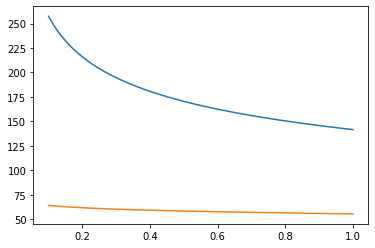

In [145]:
fig, ax = plt.subplots()
ax.plot(r, TDM1)
ax.plot(r, TDM2)

In [147]:
i = 970
print(derivativeTDM_wrt_r(r[i], 1., [1., 20., 0.42], mass, v=100.))
print((TDM1[i+1]-TDM1[i-1])/(r[i+1]-r[i-1]))

print(derivativeTDM_wrt_r(r[i], 0.1, [0.2, 20., 0.42], mass, v=100.))
print((TDM2[i+1]-TDM2[i-1])/(r[i+1]-r[i-1]))

-90.43268900962775
-40.02490811390011
-10.644012706958636
-4.71096853644078


In [159]:
from scipy.misc import derivative
conv_Msun_to_kg = 1.98841e+30

def derivando(r):    
    # return
    return (T_DM(r, M=mass*conv_Msun_to_kg, f=1., params=[1., 20., 0.42], v=100.))

In [161]:
derivative(derivando, r[i], dx=0.001)

-90.43273125442397

### Building analytical function for ATMO 2020 model

In [2]:
import bokeh.palettes
from scipy.optimize import curve_fit

In [3]:
path   = "../data/evolution_models/ATMO_2020_models/evolutionary_tracks/"
models = ["ATMO_CEQ/", "ATMO_NEQ_strong/", "ATMO_NEQ_weak/"]

evolution_ATMO20      = {}
evolution_ATMO20["M"] = []
for model in models:
    evolution_ATMO20[model] = {}
    files = glob.glob(path + model + "*.txt")
    for file in files:
        data = np.genfromtxt(file, unpack=True)
        evolution_ATMO20[model][data[0][0]] = [data[1], data[2], data[3], data[4], data[5]] 
        # age [Gyr] / Teff [K] / L [L/Lsun] / R [R/Rsun] / log g [cm/s2]
        if model==models[0]:
            #print (data[0][0], file)
            evolution_ATMO20["M"].append(data[0][0])

In [4]:
path   = "../data/evolution_models/ATMO_2020_models/evolutionary_tracks/"
models = ["ATMO_CEQ/", "ATMO_NEQ_strong/", "ATMO_NEQ_weak/"]

evolution_ATMO20      = {}
evolution_ATMO20["M"] = []
for model in models:
    evolution_ATMO20[model] = {}
    files = glob.glob(path + model + "*.txt")
    for file in files:
        data = np.genfromtxt(file, unpack=True)
        evolution_ATMO20[model][data[0][0]] = [data[1], data[2], data[3], data[4], data[5]] 
        # age [Gyr] / Teff [K] / L [L/Lsun] / R [R/Rsun] / log g [cm/s2]
        if model==models[0]:
            #print (data[0][0], file)
            evolution_ATMO20["M"].append(data[0][0])

In [5]:
from astropy.constants import M_jup, M_sun
75*M_jup/M_sun

<Quantity 0.07159457>

In [6]:
masses = np.sort(np.asarray(evolution_ATMO20["M"]))
pos    = np.where((masses > 0.004) & (masses < 0.073))
masses = masses[pos]
#print(masses)

ages = evolution_ATMO20["ATMO_CEQ/"][masses[0]][0]
Teff  = {}

for i in range(len(ages)):
    Teff[ages[i]] = []
    for mass in masses:
        Teff[ages[i]].append(evolution_ATMO20["ATMO_CEQ/"][mass][1][i])

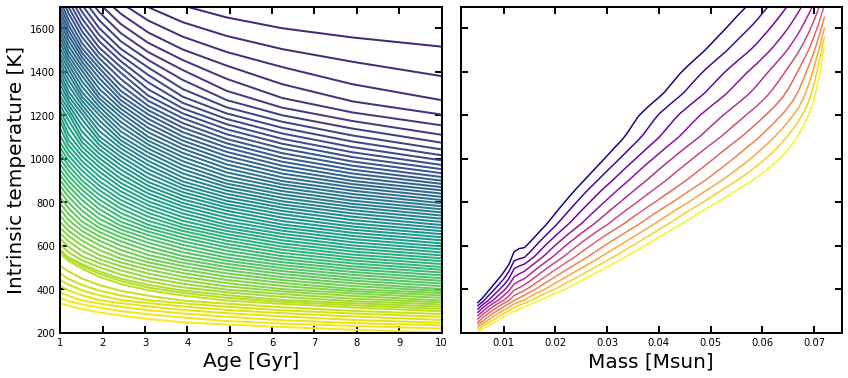

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

i     = 0
ls    = ["-", "--", ":"]
color = bokeh.palettes.viridis(len(evolution_ATMO20["M"]))
color = color[::-1]

models = ["ATMO_CEQ/"]#, "ATMO_NEQ_strong/", "ATMO_NEQ_weak/"]
for model in models:
    j = 0
    for mass in masses:
        #if (np.abs(mass-0.06) < 0.009) or (np.abs(mass-0.07) < 0.009):
        #    print(mass)
        #    continue
        ax[0].plot(evolution_ATMO20[model][mass][0], evolution_ATMO20[model][mass][1], 
                ls=ls[i], color=color[j], lw=2.)
        j = j+1
    i = i+1
ax[0].set_xlabel("Age [Gyr]", fontsize=20)
#ax[0].set_xscale("log"); ax[0].set_yscale("log")
ax[0].set_xlim([1, 10]); ax[0].set_ylim([200, 1700])
ax[0].set_ylabel(r"Intrinsic temperature [K]", fontsize=20) 


pos  = np.where((ages > 0.9) & (ages < 10.5))
ages = ages[pos]

color = bokeh.palettes.plasma(len(ages))
i=0

for age in ages:
    ax[1].plot(masses, Teff[age], color=color[i])
    i+=1        
ax[1].set_xlabel("Mass [Msun]", fontsize=20)

for axis in ['top','bottom','left','right']:
        ax[0].spines[axis].set_linewidth(2.); ax[1].spines[axis].set_linewidth(2.)
        
ax[0].tick_params(which='major',direction="in",width=2.,length=7,right=True,top=True,pad=5)
ax[1].tick_params(which='major',direction="in",width=2.,length=7,right=True,top=True,pad=5)

fig.subplots_adjust(wspace=0.05)

Text(0, 0.5, 'Intrinsic temperature [K]')

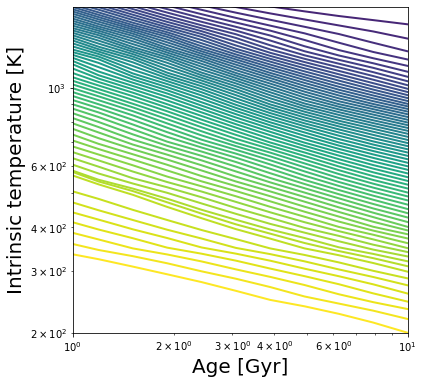

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)

i     = 0
ls    = ["-", "--", ":"]
color = bokeh.palettes.viridis(len(evolution_ATMO20["M"]))
color = color[::-1]

models = ["ATMO_CEQ/"]#, "ATMO_NEQ_strong/", "ATMO_NEQ_weak/"]
for model in models:
    j = 0
    for mass in masses:
        #if (np.abs(mass-0.06) < 0.009) or (np.abs(mass-0.07) < 0.009):
        #    print(mass)
        #    continue
        ax.plot(evolution_ATMO20[model][mass][0], evolution_ATMO20[model][mass][1], 
                ls=ls[i], color=color[j], lw=2.)
        j = j+1
    i = i+1
ax.set_xlabel("Age [Gyr]", fontsize=20)
ax.set_xscale("log"); ax.set_yscale("log")
ax.set_xlim([1, 10]); ax.set_ylim([200, 1700])
ax.set_ylabel(r"Intrinsic temperature [K]", fontsize=20) 

In [9]:
def objective_Tint_vs_age(age, a, b):
    return a*np.power(age, -b)

In [10]:
a = np.ones(len(masses))
b = np.ones(len(masses))
for i in range(len(masses)):
    ages  = evolution_ATMO20[model][masses[i]][0]
    temps = evolution_ATMO20[model][masses[i]][1]
    pos = np.where((ages>0.99) & (ages<10.1))
    
    # fit curve
    pars, cov = curve_fit(objective_Tint_vs_age, ages[pos], temps[pos])

    # cov - the estimated covariance of pars which can be used to determine the standard deviations of 
    #       the fitting parameters (square roots of the diagonals)
    _a, _b = pars
    a[i] = _a; b[i] = _b

In [232]:
#print(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]))
#print(np.sqrt(cov[0, 0])/a*100, np.sqrt(cov[1, 1])/b*100)

861.4249410819465 0.29967876495315865 3.97975458168252 0.003956262806652135
0.46199667456620924 1.3201678828563377


/home/mariacst/exoplanets/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


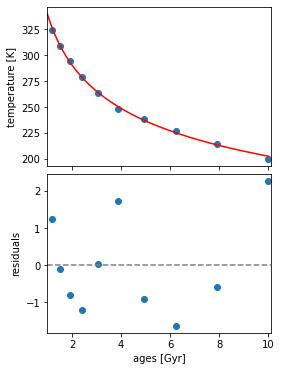

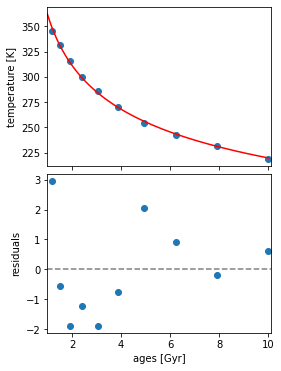

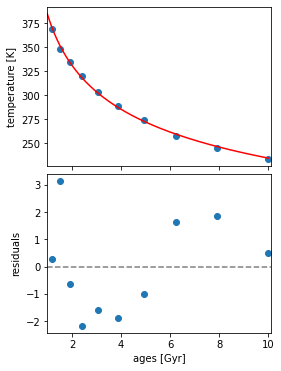

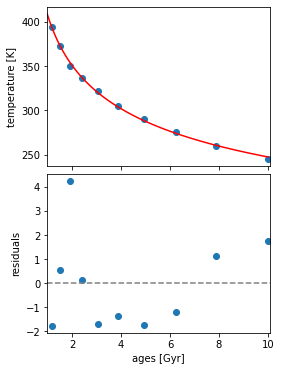

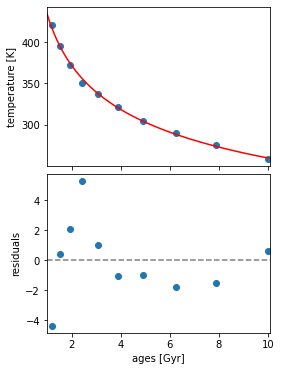

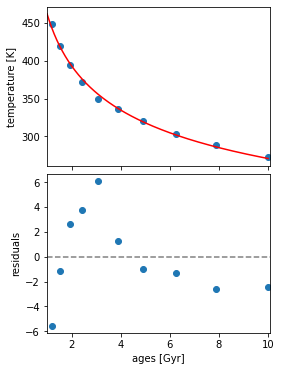

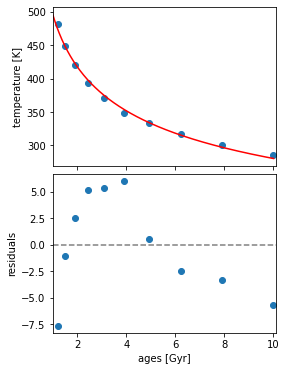

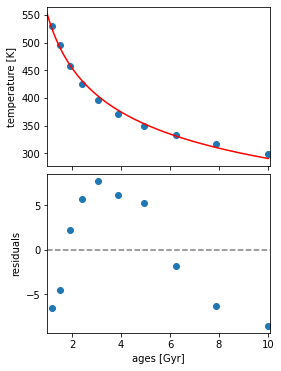

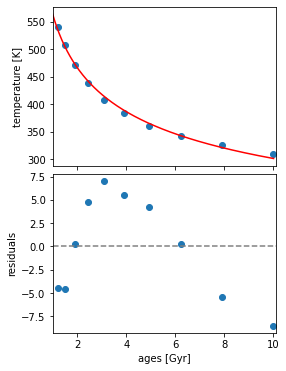

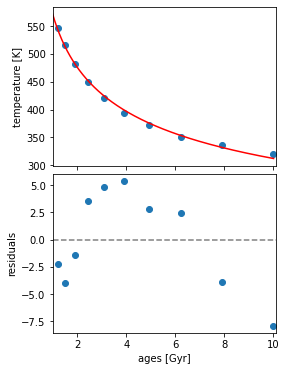

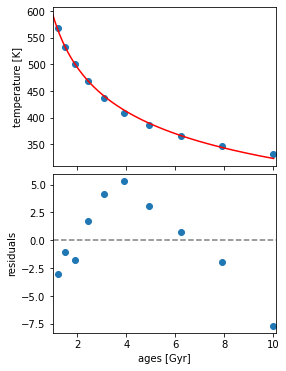

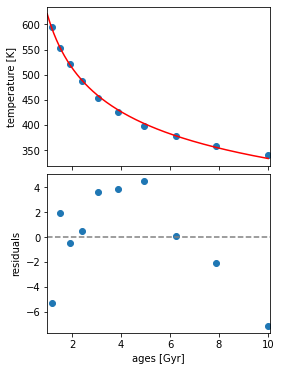

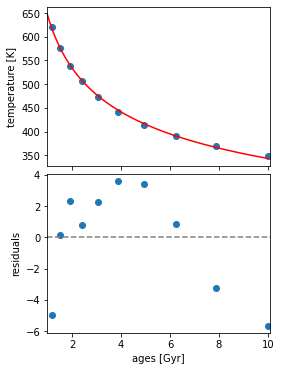

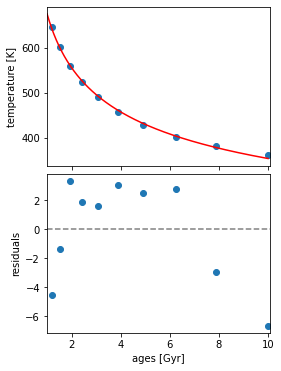

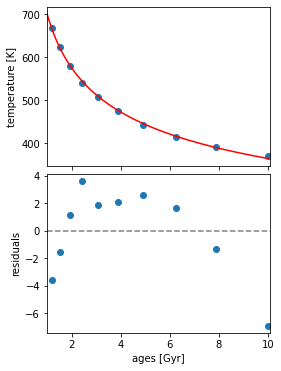

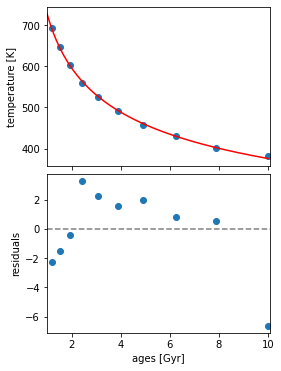

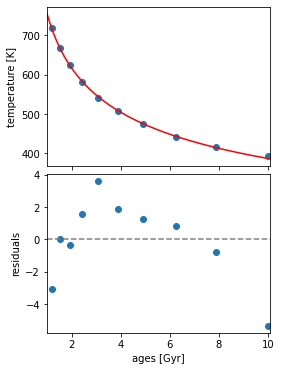

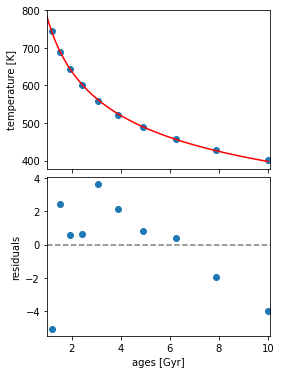

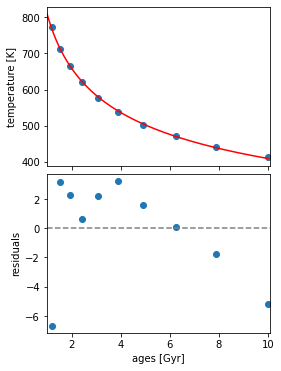

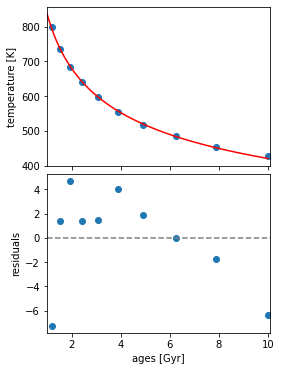

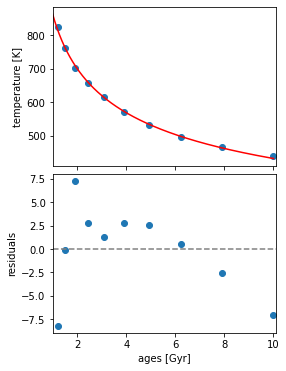

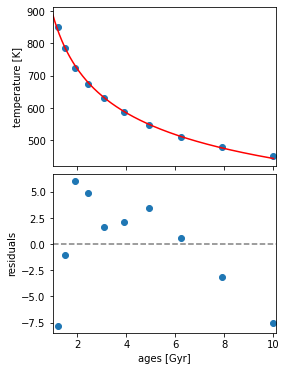

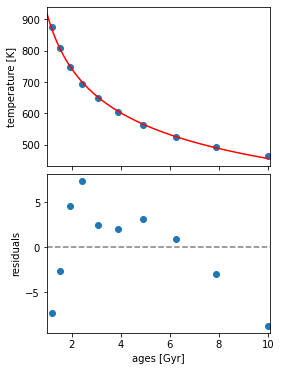

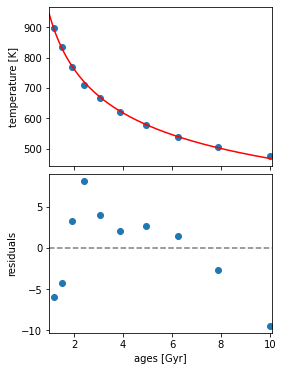

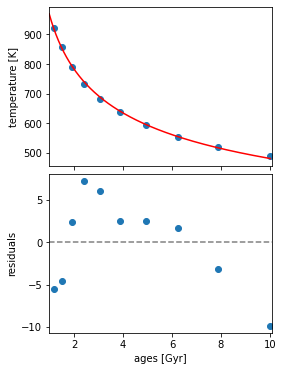

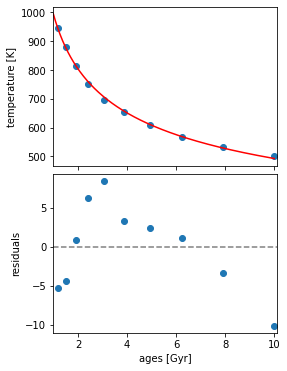

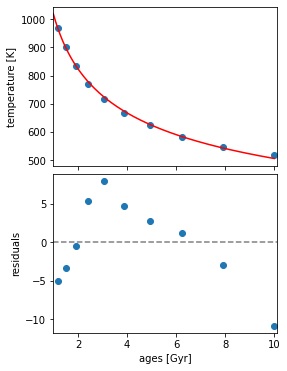

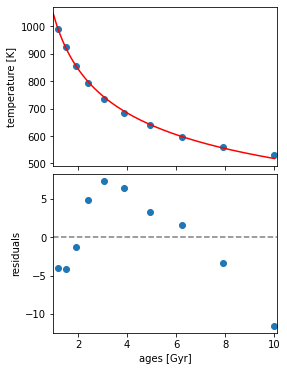

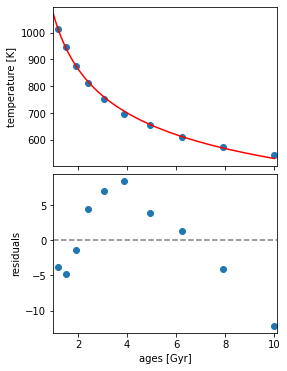

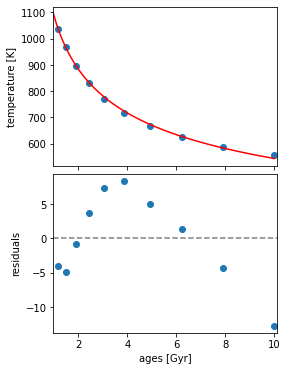

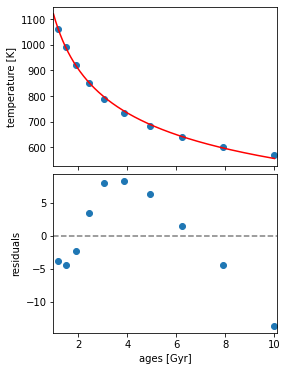

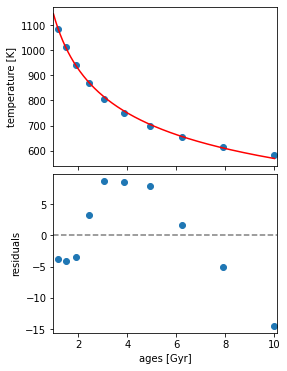

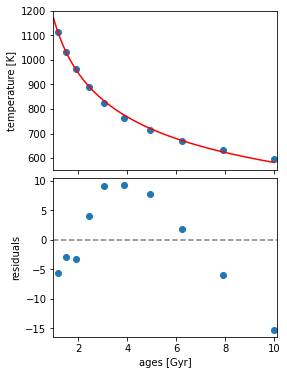

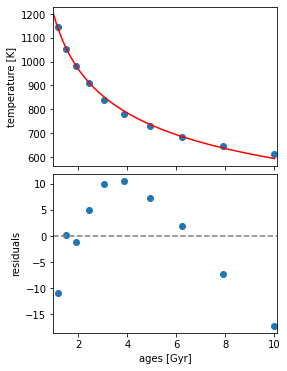

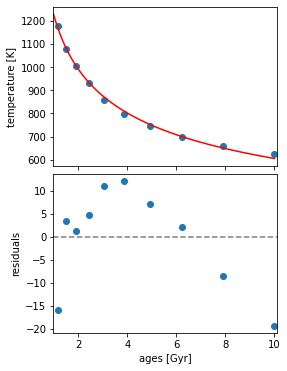

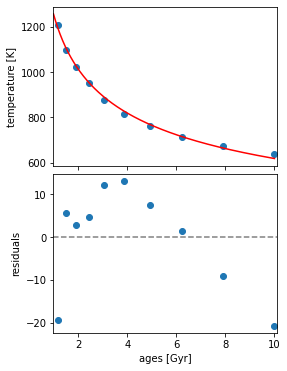

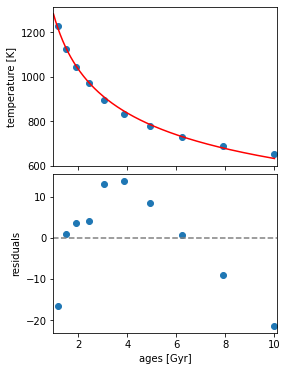

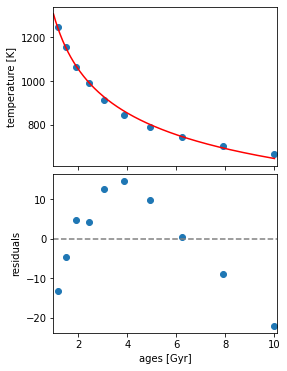

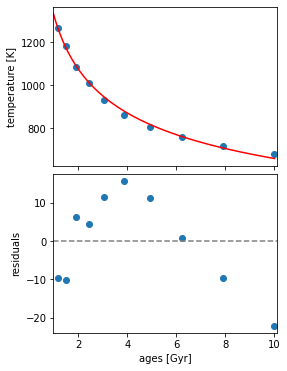

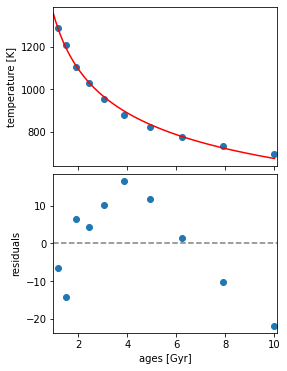

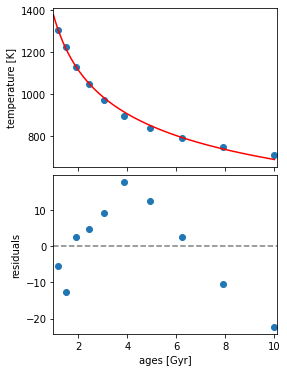

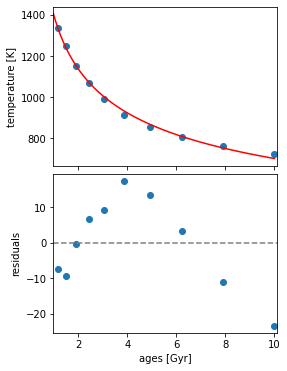

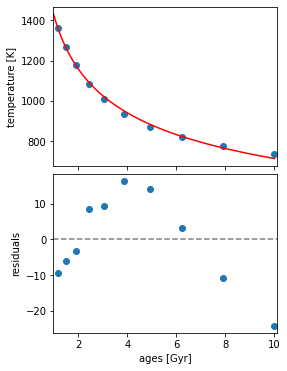

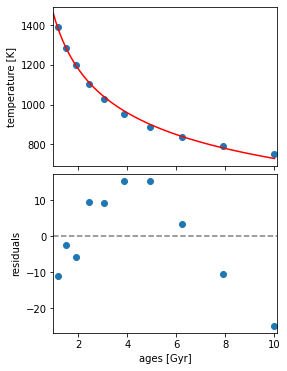

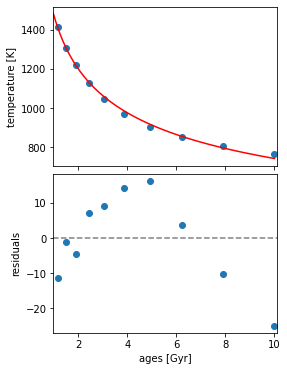

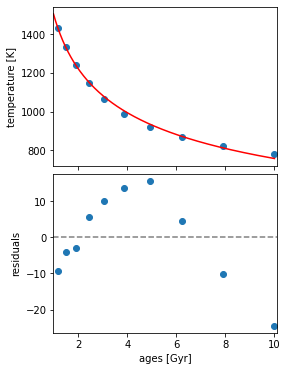

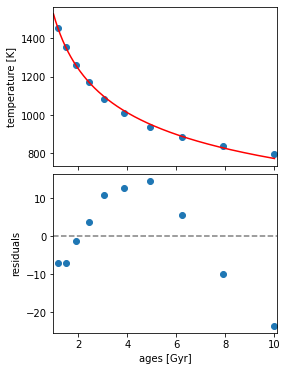

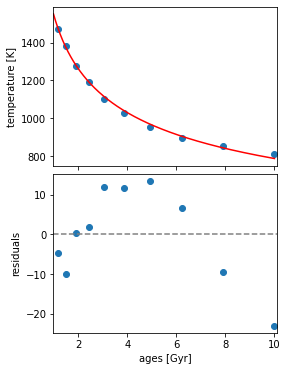

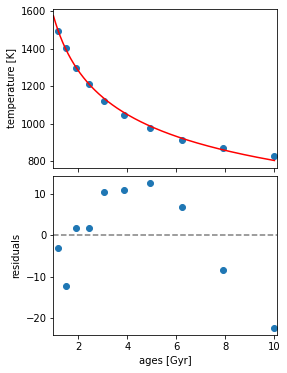

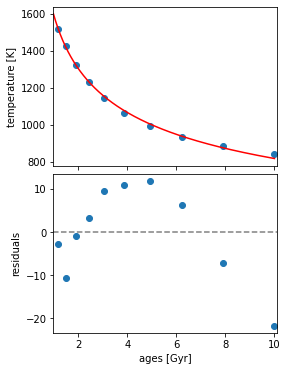

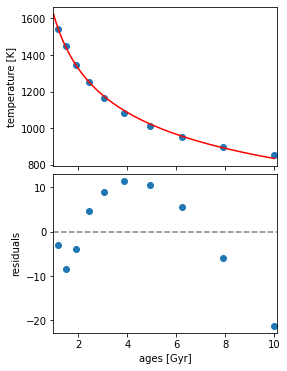

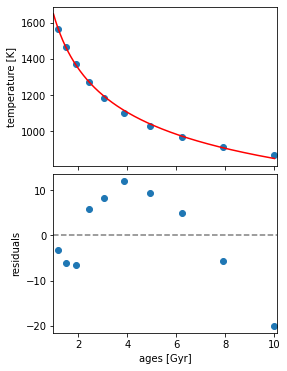

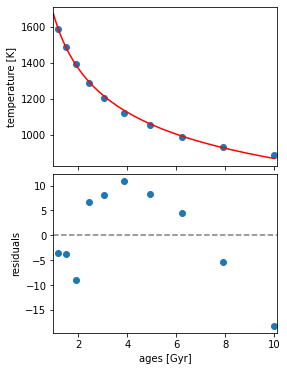

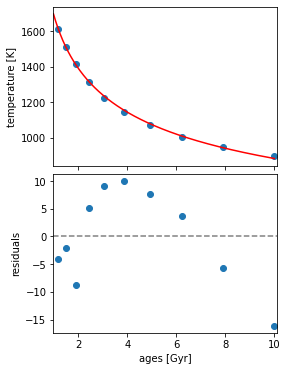

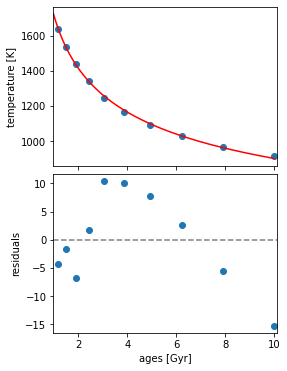

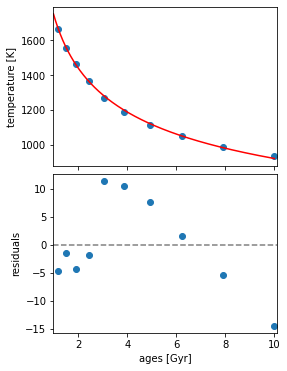

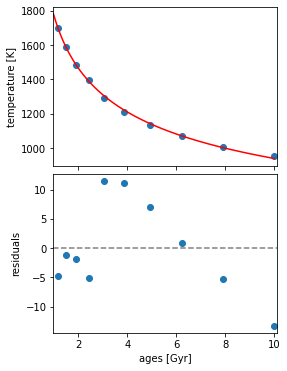

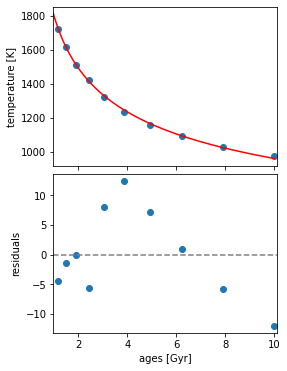

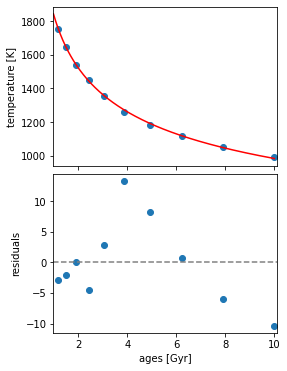

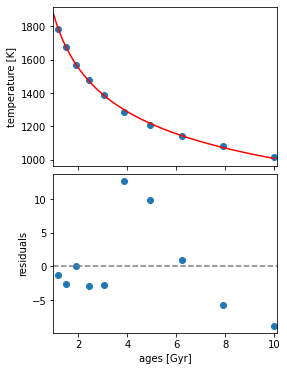

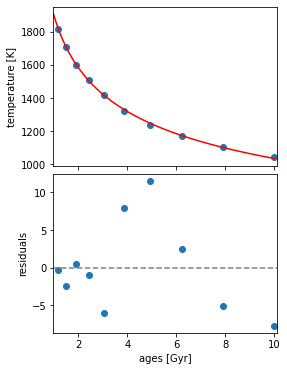

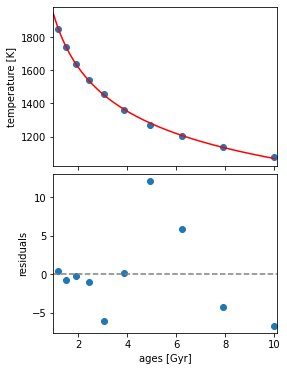

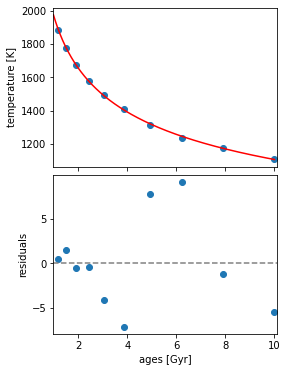

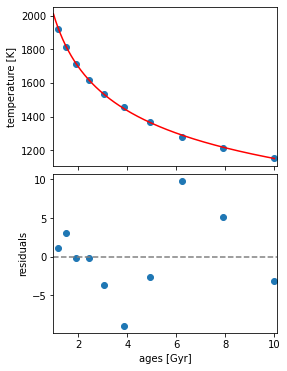

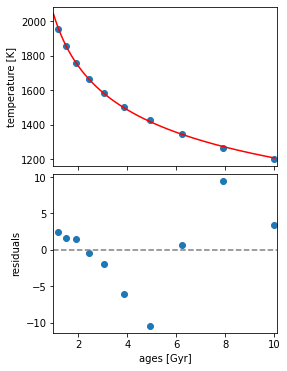

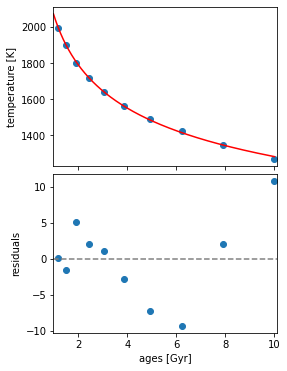

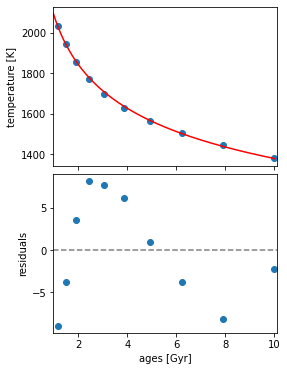

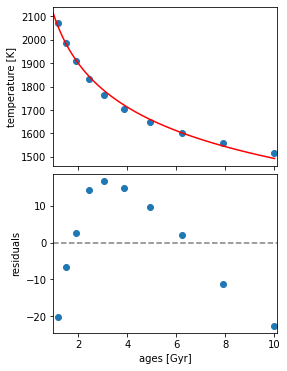

In [11]:
for i in range(len(masses)):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(4, 6))
    
    ages  = evolution_ATMO20[model][masses[i]][0]
    temps = evolution_ATMO20[model][masses[i]][1]
    pos = np.where((ages>0.99) & (ages<10.1))
    
    ax[0].scatter(ages[pos], temps[pos])
    ax[0].plot(np.linspace(0.99, 10.01, 500), objective_Tint_vs_age(np.linspace(0.99, 10.01, 500), a[i], b[i]), color="r", ls="-")
    ax[0].set_ylabel("temperature [K]")
    ax[1].scatter(ages[pos], objective_Tint_vs_age(ages[pos], a[i], b[i]) - temps[pos])
    ax[1].set_ylabel("residuals"); ax[1].set_xlabel("ages [Gyr]")
    ax[1].axhline(0., color="grey", ls="--")

    ax[0].set_xlim(0.99, 10.1)

    fig.subplots_adjust(hspace=0.05)

In [14]:
masses

array([0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011, 0.012, 0.013,
       0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02 , 0.021, 0.022,
       0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03 , 0.031,
       0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04 ,
       0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049,
       0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058,
       0.059, 0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067,
       0.068, 0.069, 0.07 , 0.071, 0.072])

In [15]:
from scipy.interpolate import interp1d
a_interp = interp1d(masses, a)
b_interp = interp1d(masses, b)

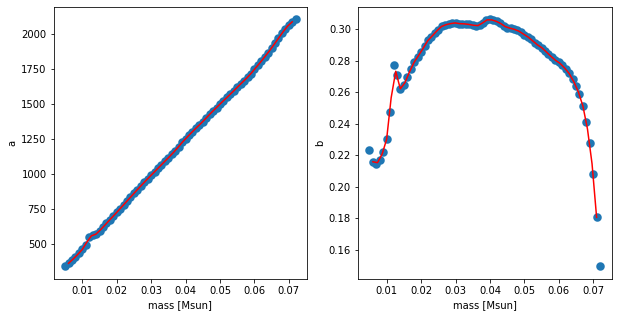

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(masses, a, lw=2.5); ax[0].set_ylabel("a"); ax[0].set_xlabel("mass [Msun]")
ax[0].plot(np.linspace(0.006, 0.071), a_interp(np.linspace(0.006, 0.071)), color="r")
ax[1].scatter(masses, b, lw=2.5); ax[1].set_ylabel("b"); ax[1].set_xlabel("mass [Msun]")
ax[1].plot(np.linspace(0.006, 0.071), b_interp(np.linspace(0.006, 0.071)), color="r")

In [11]:
def objective_Tint_vs_mass(mass, c, d):
    return c*mass + d

In [12]:
pos = np.where((ages>0.90))
print(ages[pos])

[ 0.94266845  1.19377664  1.51177507  1.91448198  2.42446202  3.07029063
  3.88815518  4.92388263  6.23550734  7.89652287 10.        ]


In [13]:
c = np.ones(len(ages[pos]))
d = np.ones(len(ages[pos]))
for i in range(len(ages[pos])):    
    # fit curve
    pars, cov = curve_fit(objective_Tint_vs_mass, masses, Teff[ages[pos][i]])

    # cov - the estimated covariance of pars which can be used to determine the standard deviations of 
    #       the fitting parameters (square roots of the diagonals)
    _c, _d = pars
    c[i] = _c; d[i] = _d

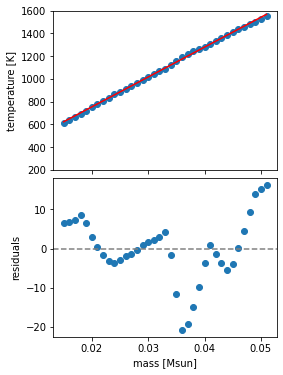

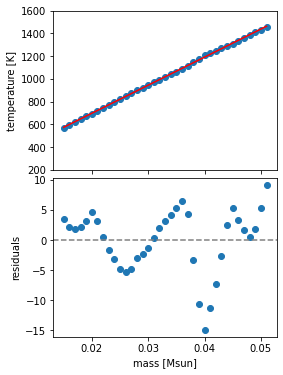

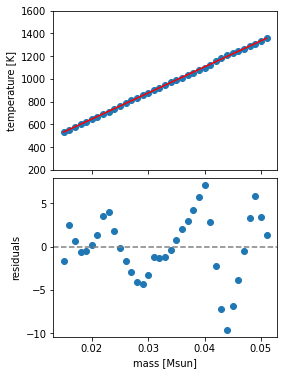

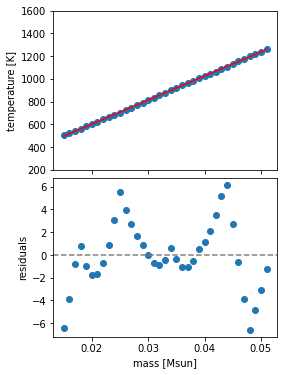

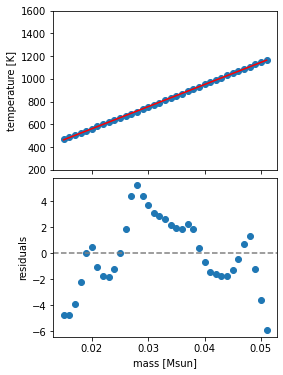

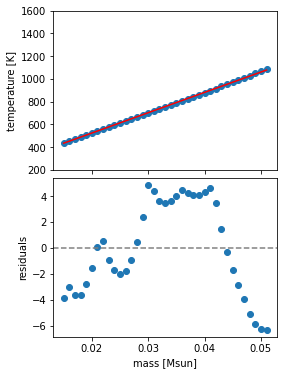

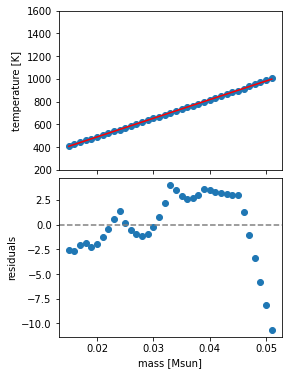

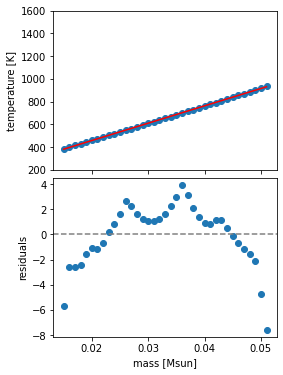

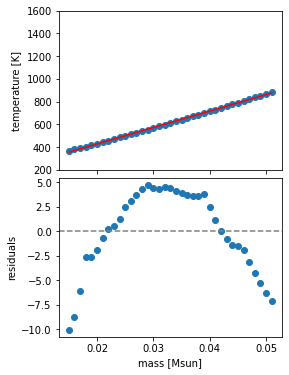

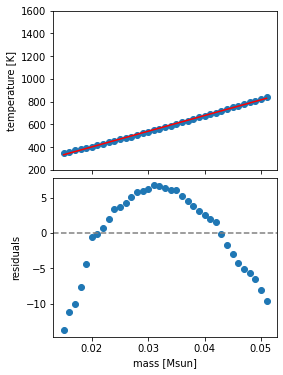

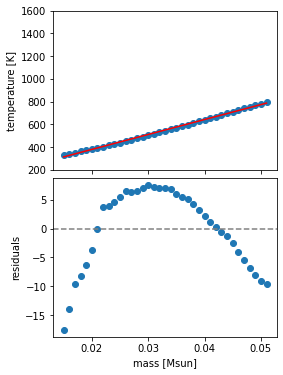

In [16]:
for i in range(len(ages[pos])):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(4, 6))
    
    ax[0].scatter(masses, Teff[ages[pos][i]])
    ax[0].plot(np.linspace(0.015, 0.051, 500), objective_Tint_vs_mass(np.linspace(0.015, 0.051, 500), c[i], d[i]), color="r", ls="-")
    ax[0].set_ylabel("temperature [K]")
    ax[1].scatter(masses, objective_Tint_vs_mass(masses, c[i], d[i]) - Teff[ages[pos][i]])
    ax[1].set_ylabel("residuals"); ax[1].set_xlabel("mass [Msun]")
    ax[1].axhline(0., color="grey", ls="--")

    ax[0].set_ylim(200, 1600)

    fig.subplots_adjust(hspace=0.05)

In [14]:
c_interp = interp1d(ages[pos], c)
d_interp = interp1d(ages[pos], d)

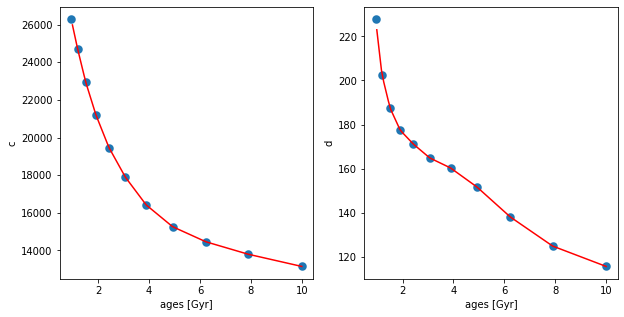

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(ages[pos], c, lw=2.5); ax[0].set_ylabel("c"); ax[0].set_xlabel("ages [Gyr]")
ax[0].plot(np.linspace(0.99, 10., 100), c_interp(np.linspace(0.99, 10., 100)), color="r")
ax[1].scatter(ages[pos], d, lw=2.5); ax[1].set_ylabel("d"); ax[1].set_xlabel("ages [Gyr]")
ax[1].plot(np.linspace(0.99, 10., 100), d_interp(np.linspace(0.99, 10., 100)), color="r")

In [17]:
# Save a, b, c arrays
#print(a.shape, b.shape, c.shape, type(a), type(b), type(c))

np.savetxt("derv_ana_wrt_A.dat", np.array([masses, a, b]).T, fmt="%.6f  %.6f  %.6f")
#np.savetxt("derv_ana_wrt_M.dat", np.array([ages[pos], c]).T, fmt="%.6f  %.6f")

In [39]:
# Load a, b, c arrays

masses, a, b = np.genfromtxt("derv_ana_wrt_A.dat", unpack=True)
ages, c = np.genfromtxt("derv_ana_wrt_M.dat", unpack=True)

In [15]:
derivativeTintana_wrt_M = interp1d(ages[pos], c) # [K/Msun]

In [16]:
def derivativeTintana_wrt_A(M, A, a, b):
    """
    Return (analytical) derivative of interinsic temperature wrt age [K/Gyr]
    (ATMO temperatures are fitted by a/A^b)
    
    Input
    -----
        M : mass [Msun]
        A : age [Gyr]
        a : =f(M) - interpolation function
        b : =f(M) - interpolation function
    """
    return (-a(M)*b(M)*np.power(A, -b(M)-1))

In [43]:
i = 4
age  = ages[i]
mass = masses[34]
print(age, mass)

# Load theoretical cooling model                                                   
path = "/home/mariacst/exoplanets/running/data/"                                   
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)               
points = np.transpose(data[0:2, :])                                                
values = data[2] 

2.424462 0.049


In [44]:
print(derivativeTintana_wrt_A(mass, age, a_interp, b_interp))
print(derivativeTint_wrt_A(mass, age, points, values))
print("-------")
age=9.5
print(derivativeTintana_wrt_A(mass, age, a_interp, b_interp))
print(derivativeTint_wrt_A(mass, age, points, values))

-139.24979485380462
-164.39625339626218
-------
-23.661393870015818
-18.733516664838135


In [45]:
print(derivativeTintana_wrt_M(age))
print(derivativeTint_wrt_M(mass, age, points, values, size=7000, h=0.001))

13303.254013025344
14430.965563427264


In [56]:
print(derivativeTintana_wrt_A(mass, age, a_interp, b_interp))
print(derivativeTint_wrt_A(mass, age, points, values))
print("-------")
age=2.5
print(derivativeTintana_wrt_A(mass, age, a_interp, b_interp))
print(derivativeTint_wrt_A(mass, age, points, values))

-23.661387319449407
-18.733516664838135
-------
-133.81388653111316
-122.05031349685669


**Checking results of emcee**

In [2]:
import pickle
from _corner import corner
from scipy.stats import gaussian_kde, binned_statistic

0.5248751319324567 69.9996843907721    -0.6522327009677156 1.0
0.000725182440090899 2.5999392175524685    -3.3762197466376165 1.0
0.010047783846549141 1.999999208793445    -0.13157226551606982 1.0


Text(0.5, 0, '$\\gamma$')

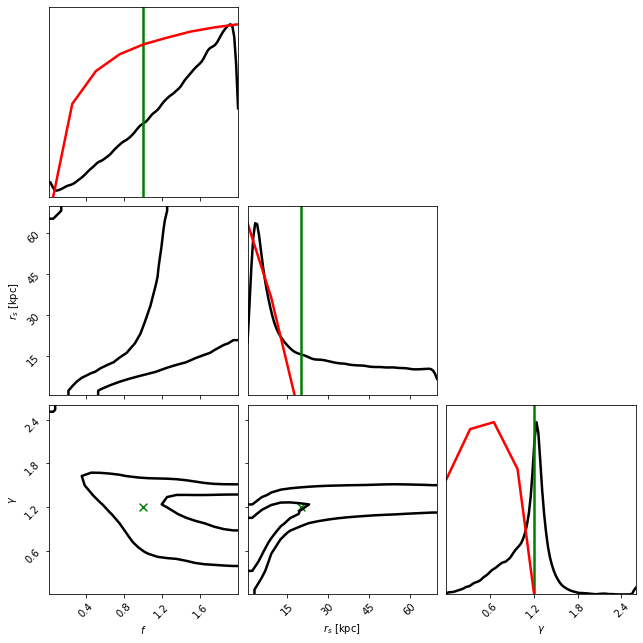

In [4]:
nBDs = 1000 ; sigma = 0.2; f = 1.; gamma = 1.2; rs = 20.

filepath = ("/home/mariacst/exoplanets/running/Tcut_ana/N%isigma%.1f/" %(nBDs, sigma))
_file    = open(filepath + ("posterior_test_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv56" %(nBDs, sigma, gamma, rs)), "rb") 
samples  = pickle.load(_file)
_file    = open(filepath + ("like_test_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv56" 
                            %(nBDs, sigma, gamma, rs)), "rb") 
like     = pickle.load(_file)

smooth=1.
fig, axes = corner(np.array([samples[:, 0], samples[:, 2], samples[:, 1]]).T, 
                   levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="k")
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], np.array([samples[:, 0], samples[:, 2], samples[:, 1]])):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="k", lw=2.5)      
    
axes[0, 0].axvline(1., color="g", ls="-", lw=2.5); axes[1, 1].axvline(rs, color="g", ls="-", lw=2.5); 
axes[2, 2].axvline(gamma, color="g", ls="-", lw=2.5); axes[2, 0].scatter(f, gamma, marker="x", color="g", s=60); 
axes[2, 1].scatter(rs, gamma, marker="x", color="g", s=60); 


bin_n=8
x = binned_statistic(samples[:, 2], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 2], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[1, 1].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[2, 2].plot(x, y, ls="-", color="r", lw=2.5)

x = binned_statistic(samples[:, 0], like, 'max', bins=bin_n)[1] 
y = binned_statistic(samples[:, 0], like, 'max', bins=bin_n+1)[0]
y = y - np.max(y) + 1
print(np.min(x), np.max(x), "  ", np.min(y), np.max(y))
axes[0, 0].plot(x, y, ls="-", color="r", lw=2.5)

axes[1, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$\gamma$")
axes[2, 1].set_xlabel(r"$r_s$ [kpc]")
axes[2, 2].set_xlabel(r"$\gamma$")